<a href="https://colab.research.google.com/github/Rizqanziyan/Tugas10/blob/main/Python10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
cd /content/drive/My Drive

/content/drive/My Drive


In [57]:
#import libaries
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [58]:
#load image
imagepaths = paths.list_images("3scene")
data = []
labels = []

In [59]:
#resize image
for imagepath in imagepaths:
  image = Image.open(imagepath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  #extract label
  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [60]:
#convert label from string to binary
lb = LabelBinarizer()
labels =  lb.fit_transform(labels)

In [61]:
#Split Train and Test data
(train_x, test_x, train_y, test_y) = train_test_split(np.array(data), np.array(labels), test_size = 0.25, shuffle = True)
print(train_x.shape)
print(test_x.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [62]:
#Build Model
model = Sequential();
#Flatten Layer
model.add(Flatten(input_shape=(64*64*3,)));
#Hidden Layer#1
model.add(Dense(units=100,
                  activation='relu',
                  kernel_initializer='uniform',));

#Hidden Layer#2
model.add(Dense(units=16,
                  activation='relu',
                  kernel_initializer='uniform'));
#Hidden Layer#2                
model.add(Dense(units=16,
                  activation='relu',
                  kernel_initializer='uniform'));

#Exit Layer
model.add(Dense(units=3,
                  activation='softmax',
                  kernel_initializer='uniform'));

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               1228900   
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [64]:
#Train Model
opt = Adam(lr=3e-4)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50, batch_size=32)

Epoch 1/50
23/23 [==============================] - 0s 10ms/step - loss: 1.0973 - accuracy: 0.3615 - val_loss: 1.0944 - val_accuracy: 0.3924
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0900 - accuracy: 0.3755 - val_loss: 1.0791 - val_accuracy: 0.3924
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0682 - accuracy: 0.3854 - val_loss: 1.0458 - val_accuracy: 0.4852
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0301 - accuracy: 0.4641 - val_loss: 1.0001 - val_accuracy: 0.5485
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.9797 - accuracy: 0.5654 - val_loss: 0.9508 - val_accuracy: 0.5781
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.9281 - accuracy: 0.5752 - val_loss: 0.9100 - val_accuracy: 0.5654
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.8885 - accuracy: 0.5767 - val_loss: 0.8779 - val_accuracy: 0.5781
Epoch 8/50
23/23 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


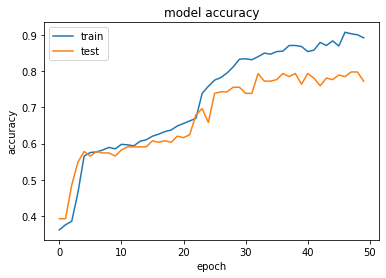

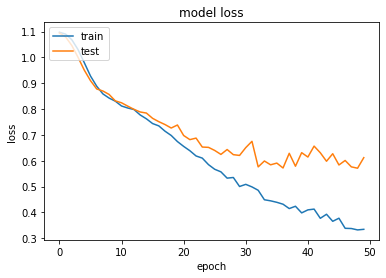

In [65]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
predictions = model.predict(test_x, batch_size=32)
print(classification_report(test_y.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

       coast       0.81      0.73      0.77        93
      forest       0.80      0.86      0.83        81
     highway       0.69      0.71      0.70        63

    accuracy                           0.77       237
   macro avg       0.77      0.77      0.77       237
weighted avg       0.77      0.77      0.77       237



In [67]:
model.save('image')

INFO:tensorflow:Assets written to: image/assets


In [68]:
import cv2
import matplotlib.pyplot as plt
image1='test.jpg'

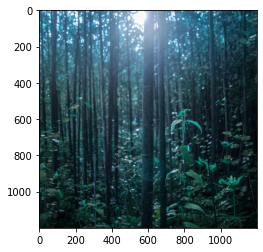

In [69]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [70]:
image_testing = Image.open('test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [71]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [72]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.40818387 0.47938344 0.11243267]]
['forest']
